In [331]:
import pandas as pd
import plotly.express as px
import numpy as np

In [332]:
df_raw = pd.read_csv('', delimiter=';')
df_raw.tail()data/Cykel_mätplatser_2023.csv

MätplatsID                      Mätplatsnamn  \
32        6664        C 0402 Enskedevägen Västra   
33        6687  C 0428 Örbyleden - Grycksbovägen   
34        6658      C 0507 Hägerstensvägen Norra   
35        6646               C 0306 Munkbroleden   
36        6640             C 0107 Tranebergsbron   

                                  MätplatsBeskrivning          Sträcka  \
32  Cykelbana längs Enskedevägen Serienummer: Y2G1...     Enskedevägen   
33  Cykelbana längs Örbyleden Serienummer: Y2H1510...        Örbyleden   
34  Cykelbana längs Hägerstensvägen Serienummer: Y...  Hägerstensvägen   
35  Cykelbana längs Munkbroleden Serienummer: U15G...     Munkbroleden   
36  Cykelbana längs Tranebergsbron Serienummer: U1...   Tranebergsbron   

           RiktplatsA        RiktplatsB                                   R1  \
32         Sockenplan  Björneborgsvägen       Sockenplan => Björneborgsvägen   
33      Skönviksvägen     Grycksbovägen       Skönviksvägen => Grycksbovägen   
34        Fågeltorget    Örnsbergsvägen        Fågeltorget => Örnsbergsvägen   
35         Kåkbrinken      Munkbrogatan           Kåkbrinken => Munkbrogatan   
36  Tranebergsslingan    Tranebergsbron  Tranebergsslingan => Tranebergsbron   

                                     R2  \
32       Björneborgsvägen => Sockenplan   
33       Grycksbovägen => Skönviksvägen   
34        Örnsbergsvägen => Fågeltorget   
35           Munkbrogatan => Kåkbrinken   
36  Tranebergsbron => Tranebergsslingan   

                            koordinater mätpunkter R1  \
32  MultiPoint(154157.867 6574308.414, 154159.012 ...   
33  MultiPoint(153198.853 6572704.983, 153200.92 6...   
34  MultiPoint(149411.201 6576660.404, 149410.973 ...   
35                 MultiPoint(153799.137 6578761.995)   
36  MultiPoint(149527.359 6579813.023, 149528.653 ...   

                            koordinater mätpunkter R2  \
32  MultiPoint(154152.603 6574311.39, 154151.459 6...   
33  MultiPoint(153198.967 6572707.844, 153201.321 ...   
34  MultiPoint(149412.117 6576653.652, 149412.231 ...   
35                  MultiPoint(153795.475 6578761.08)   
36  MultiPoint(149528.732 6579819.889, 149527.12 6...   

    koordinater mätpunkter okänt  
32                           NaN  
33                           NaN  
34                           NaN  
35                           NaN  
36                           NaN

In [333]:
df_DD_coord = pd.read_csv('data/DD_coordinates.csv', delimiter=';')
df_DD_coord.tail()

lat        lng
33  59.269616  18.056095
34  59.305134  17.989664
35  59.323983  18.066728
36  59.333434  17.991696
37        NaN        NaN

In [334]:
df_DD_coord.drop(df_DD_coord.tail(1).index,inplace=True) # drop last n rows

In [335]:
df_DD_coord.tail()

lat        lng
32  59.284001  18.072943
33  59.269616  18.056095
34  59.305134  17.989664
35  59.323983  18.066728
36  59.333434  17.991696

## Merge originial measure place data with the new DD coordinates. 

In [336]:
df_places = pd.concat([df_raw, df_DD_coord], axis=1)
df_places

MätplatsID                       Mätplatsnamn  \
0         6265                C 0203 Roslagsvägen   
1         6650      C 0318 Skanstullsbron Söderut   
2         6651       C 0318 Skanstullsbron Norrut   
3         6653             C 0319 Skansbron Östra   
4         6684        C 0437 Sofielundsplan Östra   
5         6671                C 0111 Stadshusbron   
6         6632  C 0615 Bergslagsvägen Södra sidan   
7         6660                 C 0521 Älvsjövägen   
8         6662        C 0419 Huddingevägen Västra   
9         6631                 C 0602 Kistagången   
10        6645            C 0109 Västerbron Östra   
11        6655        C 0509 Liljeholmsbron Östra   
12        6663              C 0413 Magelungsvägen   
13        6670             C 0112 Torsgatan Norra   
14        6672            C 0112 Sveavägen Västra   
15        6673             C 0112 Sveavägen Östra   
16        6679       C 0509 Liljeholmsbron Västra   
17        6680          C 0517 Västbergarondellen   
18        6689             C 0524 Slättgårdsvägen   
19        6641                    C 0101 Karlberg   
20        6657             C 0526 Årstabergsvägen   
21        6638      C 0619 Brommaplan Norra sidan   
22        6639              C 0619 Brommaplan Syd   
23        6644           C 0109 Västerbron Västra   
24        6649            C 0321 Danvikstullsbron   
25        6652            C 0319 Skansbron Västra   
26        6659       C 0507 Hägerstensvägen Södra   
27        6661         C 0419 Huddingevägen Östra   
28        6666                  C 0207 Hjorthagen   
29        6686                 C 0217 Strandvägen   
30        6665          C 0402 Enskedevägen Östra   
31        6682       C 0437 Sofielundsplan Västra   
32        6664         C 0402 Enskedevägen Västra   
33        6687   C 0428 Örbyleden - Grycksbovägen   
34        6658       C 0507 Hägerstensvägen Norra   
35        6646                C 0306 Munkbroleden   
36        6640              C 0107 Tranebergsbron   

                                  MätplatsBeskrivning                Sträcka  \
0   Cykelbana längs Roslagsvägen vid kommungränsen...           Roslagsvägen   
1   Cykelbana längs Götgatan Serienummer: Q15G1071...               Götgatan   
2   Cykelbana längs Götgatan Serienummer: Q15G1071...               Götgatan   
3   Cykelbana längs Skansbrogatan Serienummer: U15...              Skansbron   
4   Cykelbana längs Nynäsvägen Serienummer: Y2G131...   Sofielundsplan Östra   
5   Cykelbana längs Stadshusbron Serienummer: Y2H1...           Stadshusbron   
6   Cykelbana längs Bergslagsvägen Serienummer: Y2...         Bergslagsvägen   
7   Cykelbana längs Älvsjövägen Serienummer: Y2G14...            Älvsjövägen   
8   Cykelbana längs Huddingevägen Serienummer: Y2G...          Huddingevägen   
9   Cykelbana Kistagången mellan Kista och Helenel...            Kistagången   
10  Cykelbana längs Västerbron Serienummer: Y2H160...             Västerbron   
11  Cykelbana längs Liljeholmsbron Östra Serienumm...         Liljeholmsbron   
12  Cykelbana längs Magelungsvägen Serienummer: Y2...         Magelungsvägen   
13  Cykelbana längs Torsgatan Serienummer: Y2H1510...              Torsgatan   
14  Cykelbana längs Sveavägen Serienummer: Y2H1510...              Sveavägen   
15  Cykelbana längs Sveavägen Serienummer: Y2H1510...              Sveavägen   
16  Cykelbana längs Liljeholmsbron Västra Serienum...  Liljeholmsbron Västra   
17  Cykelbana längs Södertäljevägen Serienummer: Y...     Västbergarondellen   
18  Cykelbana längs Slättgårdsvägen Serienummer: Y...        Slättgårdsvägen   
19  Cykelbana mellan Rörstandsgatan och Karlberg S...               Karlberg   
20  Cykelbana längs Årstabergsvägen Serienummer: Y...        Årstabergsvägen   
21  Cykelbana längs Drottningholmsvägen Serienumme...    Drottningholmsvägen   
22  Cykelbana längs Drottningholmsvägen Serienumme...    Drottningholmsvägen   
23  Cykelbana längs Västerbron Serienummer: Y24120...             Väs

## Draw all measure points on map and show in browser

In [320]:
# Mapbox Map
mapbox_access_token =  'pk.eyJ1IjoidWxsaXoiLCJhIjoiY2xpY3hha2QyMG42bDNnbW9mYms5bTUyMyJ9.6-FqgXfSBrO5TFNQVZDrzA'
px.set_mapbox_access_token(mapbox_access_token)
fig = px.scatter_mapbox(df_places, lat="lat", lon="lng", text=df_places['Mätplatsnamn'], title="Mätplatser Cykel", labels={
                     "Sträcka": "Sträcka",
                 }, 
                hover_data={ 'RiktplatsA':True, # add other column, default formatting 
                            },
                 
                 zoom=8)
fig.show()
# view in browser
# fig.show(renderer="browser")

# Read passages and aggregate per measure point

In [321]:
df_ms_raw = pd.read_csv('data/Cykel_mätningar_2023.csv', delimiter=';')
df_ms_raw

MätplatsID            Mätplatsnamn       Tidsstämpel       Datum  \
0             6265     C 0203 Roslagsvägen  2023-01-01 00:00  2023-01-01   
1             6265     C 0203 Roslagsvägen  2023-01-01 00:15  2023-01-01   
2             6265     C 0203 Roslagsvägen  2023-01-01 00:30  2023-01-01   
3             6265     C 0203 Roslagsvägen  2023-01-01 00:45  2023-01-01   
4             6265     C 0203 Roslagsvägen  2023-01-01 01:00  2023-01-01   
...            ...                     ...               ...         ...   
511099        6689  C 0524 Slättgårdsvägen  2023-05-31 22:45  2023-05-31   
511100        6689  C 0524 Slättgårdsvägen  2023-05-31 23:00  2023-05-31   
511101        6689  C 0524 Slättgårdsvägen  2023-05-31 23:15  2023-05-31   
511102        6689  C 0524 Slättgårdsvägen  2023-05-31 23:30  2023-05-31   
511103        6689  C 0524 Slättgårdsvägen  2023-05-31 23:45  2023-05-31   

         Tidsteg  R1AntalFordon  R1LättaFordon  R1TungaFordon  R1Okänd  \
0       00:00:00            0.0            0.0            0.0      0.0   
1       00:15:00            0.0            0.0            0.0      0.0   
2       00:30:00            0.0            0.0            0.0      0.0   
3       00:45:00            0.0            0.0            0.0      0.0   
4       01:00:00            0.0            0.0            0.0      0.0   
...          ...            ...            ...            ...      ...   
511099  22:45:00            0.0            0.0            0.0      0.0   
511100  23:00:00            0.0            0.0            0.0      0.0   
511101  23:15:00            0.0            0.0            0.0      0.0   
511102  23:30:00            0.0            0.0            0.0      0.0   
511103  23:45:00            0.0            0.0            0.0      0.0   

        R1Medelhastighet  ...  R2MC  R2Cykel/MC  R2Gång  TotCykel  TotMC  \
0                    NaN  ...   0.0         0.0     0.0       0.0    0.0   
1                    NaN  ...   0.0         0.0     0.0       0.0    0.0   
2                    NaN  ...   0.0         0.0     0.0       0.0    0.0   
3                    NaN  ...   0.0         0.0     0.0       2.0    0.0   
4                    NaN  ...   0.0         0.0     0.0       0.0    0.0   
...                  ...  ...   ...         ...     ...       ...    ...   
511099               NaN  ...   0.0         0.0     0.0       0.0    0.0   
511100               NaN  ...   0.0         0.0     0.0       1.0    0.0   
511101               NaN  ...   0.0         0.0     0.0       0.0    0.0   
511102               NaN  ...   0.0         0.0     0.0       2.0    0.0   
511103               NaN  ...   0.0         0.0     0.0       1.0    0.0   

        TotCykel/MC  TotGång  R1Allt  R2Allt  TotAllt  
0               0.0      0.0     0.0     0.0      0.0  
1               0.0      0.0     0.0     0.0      0.0  
2               0.0      0.0     0.0     0.0      0.0  
3               0.0      0.0     0.0     2.0      2.0  
4               0.0      0.0     0.0     0.0      0.0  
...             ...      ...     ...     ...      ...  
511099          0.0      0.0     0.0     0.0      0.0  
511100          0.0      0.0     0.0     1.0      1.0  
511101          0.0      0.0     0.0     0.0      0.0  
511102          0.0      0.0     1.0     1.0      2.0  
511103          0.0      0.0     0.0     1.0      1.0  

[511104 rows x 35 columns]

In [322]:
df_ms = df_ms_raw.copy()
df_ms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511104 entries, 0 to 511103
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   MätplatsID         511104 non-null  int64  
 1   Mätplatsnamn       511104 non-null  object 
 2   Tidsstämpel        511104 non-null  object 
 3   Datum              511104 non-null  object 
 4   Tidsteg            511104 non-null  object 
 5   R1AntalFordon      510743 non-null  float64
 6   R1LättaFordon      510743 non-null  float64
 7   R1TungaFordon      510743 non-null  float64
 8   R1Okänd            510743 non-null  float64
 9   R1Medelhastighet   0 non-null       float64
 10  R2AntalFordon      510743 non-null  float64
 11  R2LättaFordon      510743 non-null  float64
 12  R2TungaFordon      510743 non-null  float64
 13  R2Okänd            510743 non-null  float64
 14  R2Medelhastighet   0 non-null       float64
 15  TotAntalFordon     510743 non-null  float64
 16  To

In [323]:
# check what places have most passages, these are measure errors. Probably Enskede, Västberga are errors. 
df_ms.sort_values(by='TotAllt', ascending=False).head(10)

MätplatsID                 Mätplatsnamn       Tidsstämpel       Datum  \
328564        6664   C 0402 Enskedevägen Västra  2023-03-10 13:00  2023-03-10   
428347        6680    C 0517 Västbergarondellen  2023-02-13 22:45  2023-02-13   
326945        6664   C 0402 Enskedevägen Västra  2023-02-21 16:15  2023-02-21   
426361        6680    C 0517 Västbergarondellen  2023-01-24 06:15  2023-01-24   
227553        6655  C 0509 Liljeholmsbron Östra  2023-05-23 08:15  2023-05-23   
426367        6680    C 0517 Västbergarondellen  2023-01-24 07:45  2023-01-24   
227552        6655  C 0509 Liljeholmsbron Östra  2023-05-23 08:00  2023-05-23   
140865        6646          C 0306 Munkbroleden  2023-05-23 08:15  2023-05-23   
396508        6672      C 0112 Sveavägen Västra  2023-05-15 07:00  2023-05-15   
228224        6655  C 0509 Liljeholmsbron Östra  2023-05-30 08:00  2023-05-30   

         Tidsteg  R1AntalFordon  R1LättaFordon  R1TungaFordon  R1Okänd  \
328564  13:00:00            0.0            0.0            0.0      0.0   
428347  22:45:00            0.0            0.0            0.0      0.0   
326945  16:15:00            0.0            0.0            0.0      0.0   
426361  06:15:00            0.0            0.0            0.0      0.0   
227553  08:15:00            0.0            0.0            0.0      0.0   
426367  07:45:00            0.0            0.0            0.0      0.0   
227552  08:00:00            0.0            0.0            0.0      0.0   
140865  08:15:00            0.0            0.0            0.0      0.0   
396508  07:00:00            0.0            0.0            0.0      0.0   
228224  08:00:00            0.0            0.0            0.0      0.0   

        R1Medelhastighet  ...  R2MC  R2Cykel/MC  R2Gång  TotCykel  TotMC  \
328564               NaN  ...   0.0         0.0     0.0    1287.0    0.0   
428347               NaN  ...   0.0         0.0     0.0     917.0    0.0   
326945               NaN  ...   0.0         0.0     0.0     822.0    0.0   
426361               NaN  ...   0.0         0.0     0.0     707.0    0.0   
227553               NaN  ...   0.0         0.0     0.0     587.0    0.0   
426367               NaN  ...   0.0         0.0     0.0     582.0    0.0   
227552               NaN  ...   0.0         0.0     0.0     575.0    0.0   
140865               NaN  ...   0.0         0.0     0.0     546.0    0.0   
396508               NaN  ...   0.0         0.0     0.0     544.0    0.0   
228224               NaN  ...   0.0         0.0     0.0     541.0    0.0   

        TotCykel/MC  TotGång  R1Allt  R2Allt  TotAllt  
328564          0.0      0.0  1286.0     1.0   1287.0  
428347          0.0      0.0     0.0   917.0    917.0  
326945          0.0      0.0   812.0    10.0    822.0  
426361          0.0      0.0    11.0   696.0    707.0  
227553          0.0      0.0   584.0     3.0    587.0  
426367          0.0      0.0    46.0   536.0    582.0  
227552          0.0      0.0   569.0     6.0    575.0  
140865          0.0      0.0   441.0   105.0    546.0  
396508          0.0      0.0   540.0     4.0    544.0  
228224          0.0      0.0   536.0     5.0    541.0  

[10 rows x 35 columns]

## Remove outliers

In [324]:
# Remove Enskede, Västberga from top measures. Errors reported by Trafikverket
df2=df_ms[df_ms.index.isin([328564,328564])]
df2

MätplatsID                Mätplatsnamn       Tidsstämpel       Datum  \
328564        6664  C 0402 Enskedevägen Västra  2023-03-10 13:00  2023-03-10   

         Tidsteg  R1AntalFordon  R1LättaFordon  R1TungaFordon  R1Okänd  \
328564  13:00:00            0.0            0.0            0.0      0.0   

        R1Medelhastighet  ...  R2MC  R2Cykel/MC  R2Gång  TotCykel  TotMC  \
328564               NaN  ...   0.0         0.0     0.0    1287.0    0.0   

        TotCykel/MC  TotGång  R1Allt  R2Allt  TotAllt  
328564          0.0      0.0  1286.0     1.0   1287.0  

[1 rows x 35 columns]

In [325]:
# Remove Enskede, Västberga from top measures. Errors reported by Trafikverket
list_of_outliers = [328564,328564,326945,426361,428347]
df_ms.drop(df_ms.index[(list_of_outliers)],inplace=True)

In [326]:
df_ms.sort_values(by='TotAllt', ascending=False).head(10)

MätplatsID                 Mätplatsnamn       Tidsstämpel       Datum  \
227553        6655  C 0509 Liljeholmsbron Östra  2023-05-23 08:15  2023-05-23   
426367        6680    C 0517 Västbergarondellen  2023-01-24 07:45  2023-01-24   
227552        6655  C 0509 Liljeholmsbron Östra  2023-05-23 08:00  2023-05-23   
140865        6646          C 0306 Munkbroleden  2023-05-23 08:15  2023-05-23   
396508        6672      C 0112 Sveavägen Västra  2023-05-15 07:00  2023-05-15   
228224        6655  C 0509 Liljeholmsbron Östra  2023-05-30 08:00  2023-05-30   
227649        6655  C 0509 Liljeholmsbron Östra  2023-05-24 08:15  2023-05-24   
228129        6655  C 0509 Liljeholmsbron Östra  2023-05-29 08:15  2023-05-29   
140962        6646          C 0306 Munkbroleden  2023-05-24 08:30  2023-05-24   
228225        6655  C 0509 Liljeholmsbron Östra  2023-05-30 08:15  2023-05-30   

         Tidsteg  R1AntalFordon  R1LättaFordon  R1TungaFordon  R1Okänd  \
227553  08:15:00            0.0            0.0            0.0      0.0   
426367  07:45:00            0.0            0.0            0.0      0.0   
227552  08:00:00            0.0            0.0            0.0      0.0   
140865  08:15:00            0.0            0.0            0.0      0.0   
396508  07:00:00            0.0            0.0            0.0      0.0   
228224  08:00:00            0.0            0.0            0.0      0.0   
227649  08:15:00            0.0            0.0            0.0      0.0   
228129  08:15:00            0.0            0.0            0.0      0.0   
140962  08:30:00            0.0            0.0            0.0      0.0   
228225  08:15:00            0.0            0.0            0.0      0.0   

        R1Medelhastighet  ...  R2MC  R2Cykel/MC  R2Gång  TotCykel  TotMC  \
227553               NaN  ...   0.0         0.0     0.0     587.0    0.0   
426367               NaN  ...   0.0         0.0     0.0     582.0    0.0   
227552               NaN  ...   0.0         0.0     0.0     575.0    0.0   
140865               NaN  ...   0.0         0.0     0.0     546.0    0.0   
396508               NaN  ...   0.0         0.0     0.0     544.0    0.0   
228224               NaN  ...   0.0         0.0     0.0     541.0    0.0   
227649               NaN  ...   0.0         0.0     0.0     538.0    0.0   
228129               NaN  ...   0.0         0.0     0.0     537.0    0.0   
140962               NaN  ...   0.0         0.0     0.0     531.0    0.0   
228225               NaN  ...   0.0         0.0     0.0     529.0    0.0   

        TotCykel/MC  TotGång  R1Allt  R2Allt  TotAllt  
227553          0.0      0.0   584.0     3.0    587.0  
426367          0.0      0.0    46.0   536.0    582.0  
227552          0.0      0.0   569.0     6.0    575.0  
140865          0.0      0.0   441.0   105.0    546.0  
396508          0.0      0.0   540.0     4.0    544.0  
228224          0.0      0.0   536.0     5.0    541.0  
227649          0.0      0.0   532.0     6.0    538.0  
228129          0.0      0.0   536.0     1.0    537.0  
140962          0.0      0.0   434.0    97.0    531.0  
228225          0.0      0.0   523.0     6.0    529.0  

[10 rows x 35 columns]

## Extract month & year

In [327]:
# Extract month & year from Datum
df_ms['Datum'] = pd.to_datetime(df_ms['Datum'])
df_ms['Month'] = df_ms['Datum'].dt.month 
df_ms['Year'] = df_ms['Datum'].dt.year 
df_ms.head()

MätplatsID         Mätplatsnamn       Tidsstämpel      Datum   Tidsteg  \
0        6265  C 0203 Roslagsvägen  2023-01-01 00:00 2023-01-01  00:00:00   
1        6265  C 0203 Roslagsvägen  2023-01-01 00:15 2023-01-01  00:15:00   
2        6265  C 0203 Roslagsvägen  2023-01-01 00:30 2023-01-01  00:30:00   
3        6265  C 0203 Roslagsvägen  2023-01-01 00:45 2023-01-01  00:45:00   
4        6265  C 0203 Roslagsvägen  2023-01-01 01:00 2023-01-01  01:00:00   

   R1AntalFordon  R1LättaFordon  R1TungaFordon  R1Okänd  R1Medelhastighet  \
0            0.0            0.0            0.0      0.0               NaN   
1            0.0            0.0            0.0      0.0               NaN   
2            0.0            0.0            0.0      0.0               NaN   
3            0.0            0.0            0.0      0.0               NaN   
4            0.0            0.0            0.0      0.0               NaN   

   ...  R2Gång  TotCykel  TotMC  TotCykel/MC  TotGång  R1Allt  R2Allt  \
0  ...     0.0       0.0    0.0          0.0      0.0     0.0     0.0   
1  ...     0.0       0.0    0.0          0.0      0.0     0.0     0.0   
2  ...     0.0       0.0    0.0          0.0      0.0     0.0     0.0   
3  ...     0.0       2.0    0.0          0.0      0.0     0.0     2.0   
4  ...     0.0       0.0    0.0          0.0      0.0     0.0     0.0   

   TotAllt  Month  Year  
0      0.0      1  2023  
1      0.0      1  2023  
2      0.0      1  2023  
3      2.0      1  2023  
4      0.0      1  2023  

[5 rows x 37 columns]

### Remove unneccessary columns

In [328]:
cols = ['MätplatsID', 'Mätplatsnamn', 'Tidsstämpel','Datum', 'R1Cykel', 'R2Cykel', 'TotCykel', 'TotAllt', 'Month', 'Year']

df_ms_cleaned = df_ms[cols] 
df_ms_cleaned.sort_values(by='TotAllt', ascending=False).head(10)

MätplatsID                 Mätplatsnamn       Tidsstämpel      Datum  \
227553        6655  C 0509 Liljeholmsbron Östra  2023-05-23 08:15 2023-05-23   
426367        6680    C 0517 Västbergarondellen  2023-01-24 07:45 2023-01-24   
227552        6655  C 0509 Liljeholmsbron Östra  2023-05-23 08:00 2023-05-23   
140865        6646          C 0306 Munkbroleden  2023-05-23 08:15 2023-05-23   
396508        6672      C 0112 Sveavägen Västra  2023-05-15 07:00 2023-05-15   
228224        6655  C 0509 Liljeholmsbron Östra  2023-05-30 08:00 2023-05-30   
227649        6655  C 0509 Liljeholmsbron Östra  2023-05-24 08:15 2023-05-24   
228129        6655  C 0509 Liljeholmsbron Östra  2023-05-29 08:15 2023-05-29   
140962        6646          C 0306 Munkbroleden  2023-05-24 08:30 2023-05-24   
228225        6655  C 0509 Liljeholmsbron Östra  2023-05-30 08:15 2023-05-30   

        R1Cykel  R2Cykel  TotCykel  TotAllt  Month  Year  
227553    584.0      3.0     587.0    587.0      5  2023  
426367     46.0    536.0     582.0    582.0      1  2023  
227552    569.0      6.0     575.0    575.0      5  2023  
140865    441.0    105.0     546.0    546.0      5  2023  
396508    540.0      4.0     544.0    544.0      5  2023  
228224    536.0      5.0     541.0    541.0      5  2023  
227649    532.0      6.0     538.0    538.0      5  2023  
228129    536.0      1.0     537.0    537.0      5  2023  
140962    434.0     97.0     531.0    531.0      5  2023  
228225    523.0      6.0     529.0    529.0      5  2023

## Group passages by Mätplats & Year

In [329]:
df_ms_cleaned

MätplatsID            Mätplatsnamn       Tidsstämpel      Datum  \
0             6265     C 0203 Roslagsvägen  2023-01-01 00:00 2023-01-01   
1             6265     C 0203 Roslagsvägen  2023-01-01 00:15 2023-01-01   
2             6265     C 0203 Roslagsvägen  2023-01-01 00:30 2023-01-01   
3             6265     C 0203 Roslagsvägen  2023-01-01 00:45 2023-01-01   
4             6265     C 0203 Roslagsvägen  2023-01-01 01:00 2023-01-01   
...            ...                     ...               ...        ...   
511099        6689  C 0524 Slättgårdsvägen  2023-05-31 22:45 2023-05-31   
511100        6689  C 0524 Slättgårdsvägen  2023-05-31 23:00 2023-05-31   
511101        6689  C 0524 Slättgårdsvägen  2023-05-31 23:15 2023-05-31   
511102        6689  C 0524 Slättgårdsvägen  2023-05-31 23:30 2023-05-31   
511103        6689  C 0524 Slättgårdsvägen  2023-05-31 23:45 2023-05-31   

        R1Cykel  R2Cykel  TotCykel  TotAllt  Month  Year  
0           0.0      0.0       0.0      0.0      1  2023  
1           0.0      0.0       0.0      0.0      1  2023  
2           0.0      0.0       0.0      0.0      1  2023  
3           0.0      2.0       2.0      2.0      1  2023  
4           0.0      0.0       0.0      0.0      1  2023  
...         ...      ...       ...      ...    ...   ...  
511099      0.0      0.0       0.0      0.0      5  2023  
511100      0.0      1.0       1.0      1.0      5  2023  
511101      0.0      0.0       0.0      0.0      5  2023  
511102      1.0      1.0       2.0      2.0      5  2023  
511103      0.0      1.0       1.0      1.0      5  2023  

[511100 rows x 10 columns]

In [330]:
df_grouped_byyear = df_ms_cleaned.groupby(['MätplatsID', 'Year'],as_index = False)['TotCykel'].sum()
df_grouped_byyear.head(20).sort_values(by='TotCykel',ascending=False)

MätplatsID  Year  TotCykel
9         6646  2023  602666.0
15        6655  2023  351011.0
12        6651  2023  343941.0
11        6650  2023  341378.0
5         6640  2023  281073.0
13        6652  2023  275637.0
0         6265  2023  231026.0
8         6645  2023  188203.0
16        6657  2023  105556.0
6         6641  2023   99899.0
18        6659  2023   68956.0
19        6660  2023   59599.0
1         6631  2023   47718.0
17        6658  2023   30711.0
3         6638  2023   18449.0
10        6649  2023    3120.0
7         6644  2023       0.0
14        6653  2023       0.0
4         6639  2023       0.0
2         6632  2023       0.0

In [337]:
## Concat Year/Place measures with coordinates
df_mp_year = pd.concat([df_grouped_byyear, df_places], axis=1)
df_mp_year.sort_values(by='TotCykel',ascending=False)

MätplatsID  Year  TotCykel  MätplatsID                       Mätplatsnamn  \
9         6646  2023  602666.0        6631                 C 0602 Kistagången   
27        6671  2023  504376.0        6661         C 0419 Huddingevägen Östra   
34        6686  2023  438180.0        6658       C 0507 Hägerstensvägen Norra   
15        6655  2023  351011.0        6673             C 0112 Sveavägen Östra   
12        6651  2023  343941.0        6663              C 0413 Magelungsvägen   
11        6650  2023  341378.0        6655        C 0509 Liljeholmsbron Östra   
30        6679  2023  334509.0        6665          C 0402 Enskedevägen Östra   
5         6640  2023  281073.0        6671                C 0111 Stadshusbron   
13        6652  2023  275637.0        6670             C 0112 Torsgatan Norra   
0         6265  2023  231026.0        6265                C 0203 Roslagsvägen   
25        6666  2023  219829.0        6652            C 0319 Skansbron Västra   
32        6682  2023  199713.0        6664         C 0402 Enskedevägen Västra   
8         6645  2023  188203.0        6662        C 0419 Huddingevägen Västra   
31        6680  2023  163915.0        6682       C 0437 Sofielundsplan Västra   
26        6670  2023  126762.0        6659       C 0507 Hägerstensvägen Södra   
16        6657  2023  105556.0        6679       C 0509 Liljeholmsbron Västra   
6         6641  2023   99899.0        6632  C 0615 Bergslagsvägen Södra sidan   
33        6684  2023   81897.0        6687   C 0428 Örbyleden - Grycksbovägen   
29        6673  2023   77064.0        6686                 C 0217 Strandvägen   
23        6664  2023   70210.0        6644           C 0109 Västerbron Västra   
18        6659  2023   68956.0        6689             C 0524 Slättgårdsvägen   
24        6665  2023   60380.0        6649            C 0321 Danvikstullsbron   
19        6660  2023   59599.0        6641                    C 0101 Karlberg   
20        6661  2023   52418.0        6657             C 0526 Årstabergsvägen   
1         6631  2023   47718.0        6650      C 0318 Skanstullsbron Söderut   
35        6687  2023   43228.0        6646                C 0306 Munkbroleden   
28        6672  2023   40529.0        6666                  C 0207 Hjorthagen   
17        6658  2023   30711.0        6680          C 0517 Västbergarondellen   
36        6689  2023   23196.0        6640              C 0107 Tranebergsbron   
22        6663  2023   18780.0        6639              C 0619 Brommaplan Syd   
3         6638  2023   18449.0        6653             C 0319 Skansbron Östra   
21        6662  2023    3581.0        6638      C 0619 Brommaplan Norra sidan   
10        6649  2023    3120.0        6645            C 0109 Västerbron Östra   
14        6653  2023       0.0        6672            C 0112 Sveavägen Västra   
7         6644  2023       0.0        6660                 C 0521 Älvsjövägen   
4         6639  2023       0.0        6684        C 0437 Sofielundsplan Östra   
2         6632  2023       0.0        6651       C 0318 Skanstullsbron Norrut   

                                  MätplatsBeskrivning                Sträcka  \
9   Cykelbana Kistagången mellan Kista och Helenel...            Kistagången   
27  Cykelbana längs Huddingevägen Serienummer: Y2G...          Huddingevägen   
34  Cykelbana längs Hägerstensvägen Serienummer: Y...        Hägerstensvägen   
15  Cykelbana längs Sveavägen Serienummer: Y2H1510...              Sveavägen   
12  Cykelbana längs Magelungsvägen Serienummer: Y2...         Magelungsvägen   
11  Cykelbana längs Liljeholmsbron Östra Serienumm...         Liljeholmsbron   
30  Cykelbana längs Enskedevägen Serienummer: Y2G1...           Enskedevägen   
5   Cykelbana längs Stadshusbron Serienummer: Y2H1...           Stadshusbron   
13  Cykelbana längs Torsgatan Serienummer: Y2H1510...              Torsgatan   
0   Cykelbana längs Roslagsvägen vid kommungränsen...           Roslagsvägen   
25  Cykelbana längs Skansbron Serienummer: U1

## Group passages by Mätplats & Month

In [279]:
grouped_by_month = df_ms_cleaned.groupby(['MätplatsID', 'Month'],as_index = False)['TotCykel'].sum()
print(grouped)

                  R1Cykel  R2Cykel  TotCykel  TotAllt     Year
MätplatsID Month                                              
6265       1      14789.0  14118.0   28907.0  28907.0  6020448
           2      14516.0  13558.0   28074.0  28074.0  5437824
           3      14175.0  13826.0   28001.0  28001.0  6020448
           4      27495.0  26753.0   54248.0  54248.0  5826240
           5      46563.0  45233.0   91796.0  91796.0  6020448
...                   ...      ...       ...      ...      ...
6689       1        490.0   1967.0    2457.0   2457.0  6020448
           2        434.0   1780.0    2214.0   2214.0  5437824
           3        501.0   1980.0    2481.0   2481.0  6020448
           4       1157.0   4708.0    5865.0   5865.0  5826240
           5       2327.0   7852.0   10179.0  10179.0  6020448

[182 rows x 5 columns]


## Aggregate by Month

In [280]:
# Aggregate on Mätplats and Month
agg_functions = {'MätplatsID': 'first', 'Mätplatsnamn': 'first', 'Tidsstämpel':'last','Datum': 'last', 'R1Cykel':'last','R2Cykel': 'last', 'TotAllt': 'first', 'TotCykel': 'sum'}

#create new DataFrame by combining rows with same id values
df_per_place = df_ms_cleaned.groupby(['MätplatsID', 'Month']).aggregate(agg_functions)
df_per_place.sort_values(by='Mätplatsnamn')

# df_ms_cleaned.groupby(['MätplatsID', 'Month']).sum()


MätplatsID           Mätplatsnamn       Tidsstämpel  \
MätplatsID Month                                                        
6641       2            6641        C 0101 Karlberg  2023-02-28 23:45   
           1            6641        C 0101 Karlberg  2023-01-31 23:45   
           3            6641        C 0101 Karlberg  2023-03-31 23:45   
           4            6641        C 0101 Karlberg  2023-04-30 23:45   
           5            6641        C 0101 Karlberg  2023-05-31 23:45   
...                      ...                    ...               ...   
6639       4            6639  C 0619 Brommaplan Syd  2023-04-30 23:45   
           5            6639  C 0619 Brommaplan Syd  2023-05-31 23:45   
           1            6639  C 0619 Brommaplan Syd  2023-01-31 23:45   
           3            6639  C 0619 Brommaplan Syd  2023-03-31 23:45   
           2            6639  C 0619 Brommaplan Syd  2023-02-28 23:45   

                      Datum  R1Cykel  R2Cykel  TotAllt  TotCykel  
MätplatsID Month                                                  
6641       2     2023-02-28      0.0      0.0      0.0   13512.0  
           1     2023-01-31      0.0      1.0      0.0   13739.0  
           3     2023-03-31      0.0      1.0      0.0   12519.0  
           4     2023-04-30      0.0      4.0      3.0   23253.0  
           5     2023-05-31      0.0      6.0      2.0   36876.0  
...                     ...      ...      ...      ...       ...  
6639       4     2023-04-30      0.0      0.0      0.0       0.0  
           5     2023-05-31      0.0      0.0      0.0       0.0  
           1     2023-01-31      0.0      0.0      0.0       0.0  
           3     2023-03-31      0.0      0.0      0.0       0.0  
           2     2023-02-28      0.0      0.0      0.0       0.0  

[182 rows x 8 columns]

In [281]:

# Aggregate on Total for dataset (Year)
agg_functions = {'MätplatsID': 'first', 'Mätplatsnamn': 'first', 'Tidsstämpel':'last','Datum': 'last', 'R1Cykel':'last','R2Cykel': 'last', 'TotAllt': 'first', 'TotCykel': 'sum'}

#create new DataFrame by combining rows with same id values
df_per_place = df_ms_cleaned.groupby(df_ms_cleaned['MätplatsID']).aggregate(agg_functions)
df_per_place.sort_values(by='TotCykel', ascending=False)



MätplatsID                       Mätplatsnamn       Tidsstämpel  \
MätplatsID                                                                    
6646              6646                C 0306 Munkbroleden  2023-05-31 23:45   
6671              6671                C 0111 Stadshusbron  2023-05-31 23:45   
6686              6686                 C 0217 Strandvägen  2023-05-31 23:45   
6655              6655        C 0509 Liljeholmsbron Östra  2023-05-31 23:45   
6651              6651       C 0318 Skanstullsbron Norrut  2023-05-31 23:45   
6650              6650      C 0318 Skanstullsbron Söderut  2023-05-31 23:45   
6679              6679       C 0509 Liljeholmsbron Västra  2023-05-31 23:45   
6640              6640              C 0107 Tranebergsbron  2023-05-31 23:45   
6652              6652            C 0319 Skansbron Västra  2023-05-31 23:45   
6265              6265                C 0203 Roslagsvägen  2023-05-31 23:45   
6666              6666                  C 0207 Hjorthagen  2023-05-31 23:45   
6682              6682       C 0437 Sofielundsplan Västra  2023-05-31 23:45   
6645              6645            C 0109 Västerbron Östra  2023-05-31 23:45   
6680              6680          C 0517 Västbergarondellen  2023-05-31 23:45   
6670              6670             C 0112 Torsgatan Norra  2023-05-31 23:45   
6657              6657             C 0526 Årstabergsvägen  2023-04-27 23:45   
6641              6641                    C 0101 Karlberg  2023-05-31 23:45   
6684              6684        C 0437 Sofielundsplan Östra  2023-05-31 23:45   
6673              6673             C 0112 Sveavägen Östra  2023-05-03 23:45   
6664              6664         C 0402 Enskedevägen Västra  2023-05-31 23:45   
6659              6659       C 0507 Hägerstensvägen Södra  2023-05-31 23:45   
6665              6665          C 0402 Enskedevägen Östra  2023-05-31 23:45   
6660              6660                 C 0521 Älvsjövägen  2023-05-31 23:45   
6661              6661         C 0419 Huddingevägen Östra  2023-05-31 23:45   
6631              6631                 C 0602 Kistagången  2023-05-31 23:45   
6687              6687   C 0428 Örbyleden - Grycksbovägen  2023-05-31 23:45   
6672              6672            C 0112 Sveavägen Västra  2023-05-31 23:45   
6658              6658       C 0507 Hägerstensvägen Norra  2023-05-19 23:45   
6689              6689             C 0524 Slättgårdsvägen  2023-05-31 23:45   
6663              6663              C 0413 Magelungsvägen  2023-05-31 23:45   
6638              6638      C 0619 Brommaplan Norra sidan  2023-05-31 23:45   
6662              6662        C 0419 Huddingevägen Västra  2023-05-31 23:45   
6649              6649            C 0321 Danvikstullsbron  2023-05-31 23:45   
6653              6653             C 0319 Skansbron Östra  2023-05-31 23:45   
6644              6644           C 0109 Västerbron Västra  2023-05-31 23:45   
6639              6639              C 0619 Brommaplan Syd  2023-05-31 23:45   
6632              6632  C 0615 Bergslagsvägen Södra sidan  2023-05-31 23:45   

                Datum  R1Cykel  R2Cykel  TotAllt  TotCykel  
MätplatsID                                                  
6646       2023-05-31      6.0     11.0      2.0  602666.0  
6671       2023-05-31      8.0      6.0      1.0  504376.0  
6686       2023-05-31      0.0     10.0      0.0  438180.0  
6655       2023-05-31      1.0      1.0      0.0  351011.0  
6651       2023-05-31      6.0      0.0      4.0  343941.0  
6650       2023-05-31     13.0      0.0      0.0  341378.0  
6679       2023-05-31      1.0      0.0      1.0  334509.0  
6640       2023-05-31      0.0     10.0      1.0  281073.0  
6652       2023-05-31      3.0      2.0      3.0  275637.0  
6265       2023-05-31      0.0      1.0      0.0  231026.0  
6666       2023-05-31      1.0      3.0      0.0  219829.0  
6682       2023-05-31      0.0      2.0      0.0  199713.0  
6645       2023-05-31      2.0      0.0      2.0  188203.0  
6680       2023

<AxesSubplot:title={'center':'Cykelpassager Totalt 2023-01-01-> 2023-05-31'}, ylabel='Mätplatsnamn'>

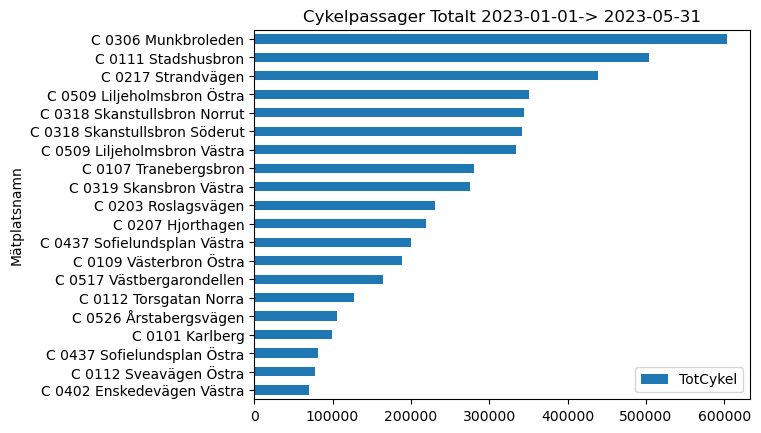

In [282]:
# Plot places 

df_per_place.sort_values(by="TotCykel",ascending=True).tail(20).plot.barh(x='Mätplatsnamn',y='TotCykel', title="Cykelpassager Totalt 2023-01-01-> 2023-05-31")

In [283]:
df_per_place.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37 entries, 6265 to 6689
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   MätplatsID    37 non-null     int64         
 1   Mätplatsnamn  37 non-null     object        
 2   Tidsstämpel   37 non-null     object        
 3   Datum         37 non-null     datetime64[ns]
 4   R1Cykel       37 non-null     float64       
 5   R2Cykel       37 non-null     float64       
 6   TotAllt       37 non-null     float64       
 7   TotCykel      37 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 2.6+ KB


In [284]:
df_per_place.head()

MätplatsID                       Mätplatsnamn       Tidsstämpel  \
MätplatsID                                                                    
6265              6265                C 0203 Roslagsvägen  2023-05-31 23:45   
6631              6631                 C 0602 Kistagången  2023-05-31 23:45   
6632              6632  C 0615 Bergslagsvägen Södra sidan  2023-05-31 23:45   
6638              6638      C 0619 Brommaplan Norra sidan  2023-05-31 23:45   
6639              6639              C 0619 Brommaplan Syd  2023-05-31 23:45   

                Datum  R1Cykel  R2Cykel  TotAllt  TotCykel  
MätplatsID                                                  
6265       2023-05-31      0.0      1.0      0.0  231026.0  
6631       2023-05-31      0.0      0.0      0.0   47718.0  
6632       2023-05-31      0.0      0.0      0.0       0.0  
6638       2023-05-31      0.0      0.0      0.0   18449.0  
6639       2023-05-31      0.0      0.0      0.0       0.0